<a href="https://colab.research.google.com/github/jakubtwalczak/dsbootcampudemy/blob/main/6_Uczenie_maszynowe/8_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wprowadzenie.

Maszyny wektorów nośnych (Support Vector Machines - SVM) były często wykorzystywane do klasyfikacji obrazów, gdy jeszcze nie zostały rozwinięte neuronowe sieci konwolucyjne. Za pomocą algorytmów z tej grupy rozwiązywać możemy problemy z zakresu zarówno klasyfikacji, jak i regresji.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
sns.set()

Po imporcie bibliotek wczytujemy dane, na których będziemy pracować. Jest to zbiór zawierający cyfry od 0 do 9, napisane odręcznie.

In [2]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Wyświetlmy klucze słownika, następnie podzielmy dane na obrazy i etykiety i zobaczmy, jakie wymiary mają poszczególne tablice.

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
images = digits.images
labels = digits.target
print('images shape:', images.shape)
print('labels shape:', labels.shape)

images shape: (1797, 8, 8)
labels shape: (1797,)


Każde zdjęcie jest zapisane w postaci tablicy ndarray o wymiarach 8 x 8 pikseli. Możemy je wyświetlić za pomocą biblioteki matplotlib.

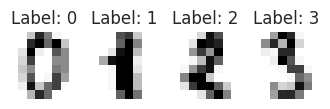

In [5]:
plt.figure(figsize=(4,4))
for index, (image, label) in enumerate(list(zip(images, labels))[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title('Label: {}'.format(index, label))

# Przygotowanie danych.

Dane podzielimy za pomocą funkcji **train_test_split** na zbiory: treningowy i testowy. Przy okazji zmieniamy kształt naszych danych, aby miały one 2, nie 3 wymiary.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print()
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


# Budowa i trening modelu.

Importujemy klasę SVC i tworzymy jej instancję z domyślnymi parametrami.

In [7]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

# Ocena modelu.

Sprawdzimy dopasowanie modelu, stosując predykcję na zbiorze testowym.

In [8]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 8, 0, 3, 0, 8, 9, 0, 0, 7, 8, 2, 7, 6, 5, 6, 6, 1, 3, 5, 9, 0,
       7, 7, 8, 8, 0, 1, 7, 9, 1, 9, 9, 6, 1, 5, 6, 6, 9, 8, 3, 8, 0, 9,
       3, 6, 0, 0, 7, 2, 2, 2, 2, 1, 4, 7, 9, 8, 1, 5, 8, 3, 5, 6, 1, 5,
       9, 3, 5, 8, 1, 1, 4, 2, 6, 5, 7, 2, 0, 4, 1, 6, 7, 2, 3, 8, 8, 6,
       9, 6, 7, 8, 1, 3, 7, 0, 1, 5, 0, 8, 7, 8, 5, 2, 9, 1, 3, 4, 6, 6,
       7, 1, 7, 1, 3, 0, 3, 1, 2, 0, 5, 2, 7, 9, 5, 8, 3, 8, 5, 6, 6, 3,
       8, 0, 9, 2, 7, 7, 2, 3, 7, 3, 9, 5, 9, 1, 3, 0, 8, 5, 6, 5, 1, 4,
       5, 4, 8, 6, 6, 3, 1, 8, 7, 7, 4, 0, 6, 0, 0, 4, 0, 6, 9, 6, 0, 3,
       7, 2, 5, 6, 9, 2, 9, 2, 1, 1, 1, 8, 4, 7, 2, 5, 6, 8, 3, 8, 6, 2,
       9, 4, 6, 1, 3, 8, 8, 9, 1, 7, 4, 9, 8, 6, 5, 7, 0, 1, 2, 2, 0, 7,
       7, 2, 4, 9, 8, 7, 9, 9, 3, 0, 0, 2, 0, 2, 6, 6, 2, 2, 5, 8, 8, 5,
       9, 5, 1, 2, 3, 3, 3, 6, 4, 0, 9, 0, 9, 0, 0, 8, 4, 4, 6, 7, 5, 9,
       9, 1, 3, 1, 1, 9, 2, 8, 8, 1, 1, 9, 3, 3, 4, 9, 4, 4, 7, 3, 1, 4,
       8, 3, 8, 9, 0, 7, 5, 1, 9, 2, 4, 6, 9, 8, 8,

Wyświetlimy również standardowe metryki - precyzję czułość, F1 i dokładność - za pomocą raportu klasyfikacji.

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        40
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        37
           5       1.00      0.95      0.98        42
           6       0.98      1.00      0.99        47
           7       0.98      1.00      0.99        47
           8       0.98      1.00      0.99        46
           9       0.98      0.98      0.98        53

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



Wyświetlamy macierz pomyłek. Model popełnia pojedyncze pomyłki: raz pomylił 5 z 9, raz 8 z 1 i raz 9 z 8 i ogólnie działa bardzo dobrze bez dostrajania parametrów.

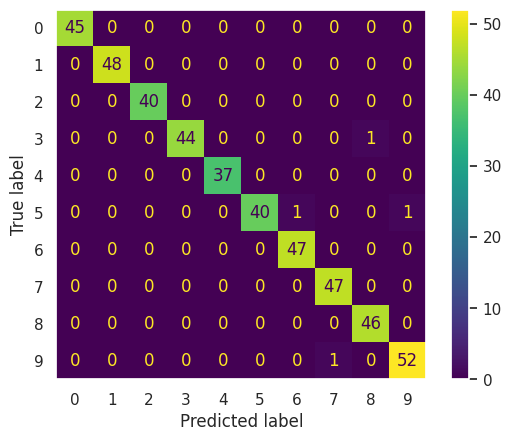

In [10]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

# Wyświetlenie błędnych przewidywań.

Chcielibyśmy się dostać do błędów w predykcji. W tym celu zbudujemy obiekt dataframe zawierający wszystkie przewidywania modelu.

In [11]:
results = pd.DataFrame(data={'y_pred': y_pred, 'y_test': y_test})
results

,y_pred,y_test
0,0,0
1,8,8
2,0,0
3,3,3
4,0,0
...,...,...
445,0,0
446,7,7
447,4,4
448,5,5


Z ramki możemy wydobyć błędne predykcje. Łącznie mamy ich 3.

In [12]:
errors = results[results['y_pred'] != results['y_test']]
errors

,y_pred,y_test
297,6,5
362,7,9
376,9,5
424,8,3


Na koniec wyświetlmy obrazy, co do których model się pomylił. Nietrudno zauważyć, iż dane są mocno zaszumione, co nie pozostało bez wpływu na przewidywania modelu.

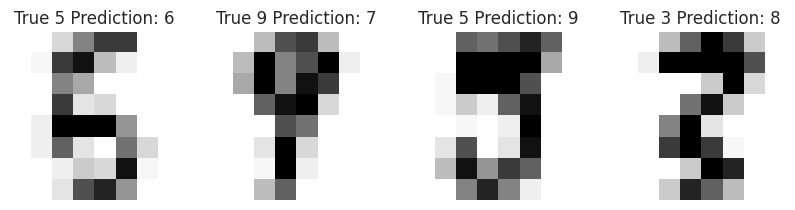

In [13]:
plt.figure(figsize=(10, 10))
for idx, error_idx in enumerate(list(errors.index)[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")